# Import libraries

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import json
import matplotlib.pyplot  as plt
from collections import OrderedDict



# Load csv files


In [4]:
#first dataset
datasetO = pd.read_csv('E:/Master-Data Science/2019-Oct.csv')

In [5]:
#second dataset
datasetN = pd.read_csv('E:/Master-Data Science/2019-Nov.csv')

In [4]:
# Define Files to be Read
files = ['E:/Master-Data Science/2019-Oct.csv',
         'E:/Master-Data Science/2019-Nov.csv']

# Define DataFrame Chunk Size
#chunksize = 1000000
chunksize = 9999999


# [RQ2] What are the categories of the most trending products overall? 

## For each month visualize this information through a plot showing the number of sold products per category.


### Number of sold product per category -month: October

In [59]:
purchases_O = datasetO[datasetO['event_type'] == 'purchase']

purchases_category_O = purchases_O[purchases_O.category_code.notnull()]

O=purchases_category_O.groupby('category_code').category_code.count()\
.sort_values(ascending=False)

print(O)

category_code
electronics.smartphone          338018
electronics.audio.headphone      30503
electronics.video.tv             21565
electronics.clocks               17906
appliances.kitchen.washer        16148
                                 ...  
apparel.skirt                        4
apparel.shorts                       2
apparel.jumper                       2
apparel.jacket                       1
construction.tools.soldering         1
Name: category_code, Length: 121, dtype: int64


In [60]:
purchase_cat_O={}
    
for index, row in O.iteritems():
    #Extract category, create dict
    
    c = str(index).split('.')
    category = c[0]
    
    if category not in purchase_cat_O.keys():
        purchase_cat_O[category] = int(row)
    
    else:
        purchase_cat_O[category] += int(row)

for el in purchase_cat_O.items():
    print(el)

('electronics', 423028)
('appliances', 74996)
('computers', 27855)
('auto', 10620)
('apparel', 8002)
('construction', 7801)
('kids', 5482)
('furniture', 8301)
('accessories', 1587)
('sport', 1236)
('medicine', 310)
('stationery', 134)
('country_yard', 72)


### Number of sold product per category -month: November

In [61]:
purchases_N = datasetN[datasetN['event_type'] == 'purchase']

purchases_category_N = purchases_N[purchases_N.category_code.notnull()]

N=purchases_category_N.groupby('category_code').category_code.count()\
.sort_values(ascending=False)

print(N)

category_code
electronics.smartphone           382647
electronics.audio.headphone       40834
electronics.video.tv              30274
electronics.clocks                23237
appliances.kitchen.washer         19772
                                  ...  
construction.tools.soldering          6
country_yard.furniture.hammok         4
apparel.shorts                        2
appliances.kitchen.fryer              1
construction.tools.screw              1
Name: category_code, Length: 126, dtype: int64


In [62]:
purchase_cat_N={}
    
for index, row in N.iteritems():
    #Extract category, create dict
    
    c = str(index).split('.')
    category = c[0]
    
    if category not in purchase_cat_N.keys():
        purchase_cat_N[category] = int(row)
    
    else:
        purchase_cat_N[category] += int(row)

for el in purchase_cat_N.items():
    print(el)

('electronics', 493639)
('appliances', 99026)
('computers', 34477)
('apparel', 14215)
('auto', 10719)
('construction', 8699)
('furniture', 11542)
('kids', 6166)
('accessories', 2154)
('sport', 1489)
('medicine', 344)
('stationery', 191)
('country_yard', 60)


## Plotting results

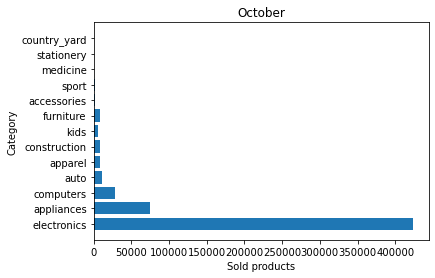

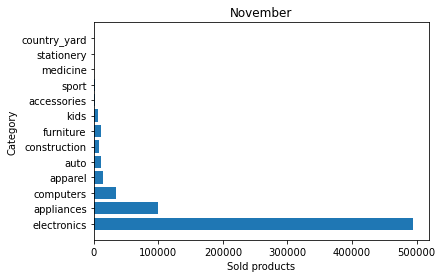

In [63]:
#October

cO=[]
vO=[]

for k in purchase_cat_O.keys():
    cO.append(k)
for i in purchase_cat_O.values():
    vO.append(i)


#November

cN=[]
vN=[]

for k in purchase_cat_N.keys():
    cN.append(k)
for i in purchase_cat_N.values():
    vN.append(i)


#Plot1
plt.title('October')
y_pos = np.arange(len(cO))
plt.barh(y_pos, vO, align='center', alpha=1)
plt.yticks(y_pos, cO)
plt.ylabel('Category')
plt.xlabel('Sold products')
plt.show()

#Plot2

plt.title('November')
y_pos = np.arange(len(cN))
plt.barh(y_pos, vN, align='center', alpha=1)
plt.yticks(y_pos, cN)
plt.ylabel('Category')
plt.xlabel('Sold products')
plt.show()




###  Plot the (5) most visited subcategories 

In [64]:
#view_d={}
import operator 

def visited_subcategory(data):
    
    # Filter Data of View Only
    view = data[data['event_type'] == 'view']
    view_category = view[view.category_code.notnull()]
    view_sub=view_category.groupby('category_code').category_code.count()\
    .sort_values(ascending=False)
    
    
    for index, row in view_sub.iteritems():
        #Extract category+sub, create dict
        c = str(index).split('.')
        category = c[0]
        product = c[1]
        subcategory = category + '.' + product
        
        if subcategory not in view_d.keys():
            view_d[subcategory] = int(row)
    
        else:
            view_d[subcategory] += int(row)

            
view_d={}           
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        visited_subcategory(chunk)
        
#print(view_d)
#d2 = sorted(view_d.items(), key=lambda x: x[-1])
#print(d2[-6:-1])      

In [65]:
d2 = sorted(view_d.items(), key=lambda x: x[1], reverse=True)
#print(d2)
d2[0:5]

[('electronics.smartphone', 25451835),
 ('appliances.kitchen', 8418017),
 ('electronics.audio', 3679555),
 ('apparel.shoes', 3554471),
 ('electronics.clocks', 3267223)]

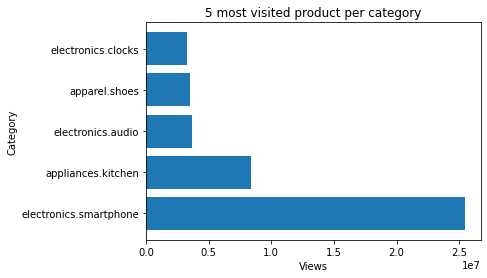

In [66]:
top5 = d2[0:5]

x = []
y=[]

for el in top5:
    x.append(el[0])
    y.append(el[1])



#Plot1
plt.title('5 most visited product per category')
y_pos = np.arange(len(x))
plt.barh(y_pos, y, align='center', alpha=1)
plt.yticks(y_pos, x)
plt.ylabel('Category')
plt.xlabel('Views')
plt.show()

## What are the 10 most sold products per category?

In [13]:
    
def sold_products_per_category(dataset):
    purchases = dataset[dataset['event_type'] == 'purchase']

    purchases_category = purchases[purchases.category_code.notnull()]

    P=purchases_category.groupby('category_code').category_code.count()\
    .sort_values(ascending=False)
        
    for index, row in P.iteritems():
        #Extract category, prod create dict

        c = str(index).split('.')
        category = c[0]
        product = c[-1]

        if category in prod_cat:

            if product in prod_cat[category]:

                prod_cat[category][product] += int(row)

            else:

                prod_cat[category][product] = int(row)

        else:

            prod_cat[category] = {product: int(row)}
            
            
prod_cat={}           
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        sold_products_per_category(chunk)

        
for el in prod_cat:    
    print(f'{el}:')
    print((list(prod_cat[el])[:10]))


electronics:
['smartphone', 'headphone', 'clocks', 'telephone', 'tablet', 'tv', 'video', 'acoustic', 'subwoofer', 'piano']
computers:
['notebook', 'hdd', 'printer', 'memory', 'desktop', 'ebooks', 'monitor', 'videocards', 'cpu', 'cooler']
appliances:
['washer', 'air_heater', 'vacuum', 'blender', 'meat_grinder', 'refrigerators', 'water_heater', 'hood', 'toster', 'hair_cutter']
auto:
['videoregister', 'player', 'radar', 'alarm', 'compressor', 'parktronic', 'winch', 'anti_freeze']
apparel:
['shoes', 'trousers', 'keds', 'slipons', 'underwear', 'tshirt', 'costume', 'moccasins', 'sock', 'scarf']
furniture:
['cabinet', 'toilet', 'table', 'blanket', 'bed', 'sofa', 'chair', 'pillow', 'bath', 'light']
construction:
['drill', 'saw', 'light', 'faucet', 'welding', 'generator', 'painting', 'pump', 'soldering', 'screw']
accessories:
['bag', 'wallet', 'umbrella']
stationery:
['cartrige']
kids:
['diapers', 'dolls', 'carriage', 'swing', 'skates', 'toys']
medicine:
['tonometer']
sport:
['trainer', 'bicycl

# [RQ3] For each category, what’s the brand whose prices are higher on average?


## Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.


In [29]:
# extract the list of the categories

def find_all_categories(data):
    
    #only categories for purchases
    purchases = data[data['event_type'] == 'purchase']
    #delete nan
    purchases_category = purchases[purchases.category_code.notnull()]
    
    categories=purchases_category['category_code']
    
    for index, row in categories.iteritems():
        category_list.append(row)


category_list=[]
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        find_all_categories(chunk)
        

In [28]:
#list of all the categories you can choose
cat_tot= list(set(category_list))

for i in cat_tot:
    print(i)

auto.accessories.parktronic
appliances.kitchen.washer
appliances.kitchen.mixer
appliances.kitchen.hob
electronics.video.projector
furniture.bathroom.bath
computers.components.videocards
computers.ebooks
electronics.audio.subwoofer
computers.components.cooler
furniture.bathroom.toilet
construction.tools.welding
appliances.environment.air_conditioner
appliances.kitchen.microwave
apparel.glove
construction.tools.drill
electronics.camera.photo
construction.tools.light
electronics.clocks
construction.tools.pump
auto.accessories.anti_freeze
computers.components.hdd
computers.notebook
kids.carriage
electronics.audio.acoustic
kids.fmcg.diapers
kids.swing
stationery.cartrige
sport.tennis
electronics.tablet
furniture.bedroom.blanket
auto.accessories.compressor
construction.components.faucet
appliances.iron
auto.accessories.alarm
furniture.universal.light
computers.peripherals.keyboard
appliances.kitchen.dishwasher
appliances.kitchen.refrigerators
sport.ski
computers.components.motherboard
electr

#### Function that asks the user a category in input and returns a plot

Choose a category:
sport.tennis


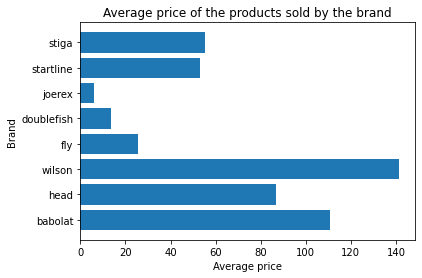

In [27]:
def avg_analysis(data, category):
    
    #preparing data, extract columns
    avg = data[['category_code', 'brand', 'price']]
    avg_brand = avg[avg.brand.notnull()]
    
    
    avg_brand.groupby(['category_code', 'brand'])['price'].mean() \
        .sort_values(ascending=False)
    
    # new series grouped by category with avg price per brand
    a = avg_brand.groupby([avg_brand.category_code, avg_brand.brand]) \
        .price.mean()
    
    #Access a group of rows and columns by category
    c = a.loc[f'{category}']

    for index, row in c.iteritems():

        # Extract category code, product and create dict
        cat_prod = str(index).split('.')
        brand = index
        product = cat_prod[-1]
        avg_price = round(float(row), 2)

        if brand not in brand_avg_price.keys():
            brand_avg_price[brand] = avg_price

    return brand_avg_price


def plot(category):
    
    #data
    dict_brand_avg={}
    for file in files:
        for chunk in pd.read_csv(file, chunksize=chunksize):
            dict_brand_avg = avg_analysis(chunk, category)

    #define x and y
    x = []
    y = []

    for i in dict_brand_avg.keys():
        x.append(i)
    for j in dict_brand_avg.values():
        y.append(j)


    # Plot
    plt.title('Average price of the products sold by the brand')
    y_pos = np.arange(len(x))
    plt.barh(y_pos, y, align='center', alpha=1)
    plt.yticks(y_pos, x)
    plt.ylabel('Brand')
    plt.xlabel('Average price')
    plt.show()

# dict with brand and avg price
brand_avg_price = {}

# category in input
print('Choose a category:')
category = input()

plot(category)

## Find, for each category, the brand with the highest average price. Return all the results in ascending order by price.

In [ ]:
def sold_products_per_category(data):
    avg = data[['category_code', 'brand', 'price']]
    avg_brand = avg[avg.brand.notnull()]

    avg_brand.groupby(['category_code', 'brand'])['price'].mean() \
        #.sort_values(ascending=False)

    #sort by price, first  the brands with highest avg price and thei category
    a = avg_brand.groupby([avg_brand.category_code, avg_brand.brand])['price'].mean() \
        .sort_values(ascending=False)


    for index, row in a.iteritems():
        # Extract category, brand, avg price create dict with only the first brand per category

        category = (index[0])
        brand = (index[1])
        avg_price = round(float(row),2)

        if category not in highest_brand.keys():
            highest_brand[category] = f'{brand} : {avg_price}'



highest_brand = {}
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        sold_products_per_category(chunk)


In [31]:
for brand in highest_brand:
    print(brand, highest_brand[brand] )

sport.bicycle pinarello : 2367.89
appliances.kitchen.refrigerators climadiff : 2325.9
electronics.clocks rado : 2112.48
appliances.kitchen.washer siemens : 1973.05
appliances.kitchen.coffee_machine jura : 1948.97
appliances.kitchen.steam_cooker kuppersberg : 1923.66
computers.desktop apple : 1821.24
kids.carriage hartan : 1801.82
electronics.video.projector xiaomi : 1801.15
appliances.kitchen.oven kuppersbusch : 1761.18
appliances.kitchen.microwave kuppersberg : 1708.65
appliances.kitchen.hood kuppersbusch : 1625.67
computers.notebook apple : 1623.24
kids.skates minimotors : 1600.52
electronics.audio.acoustic blg : 1541.87
appliances.iron laurastar : 1492.72
electronics.camera.video panasonic : 1477.8
construction.tools.generator senci : 1455.27
computers.components.videocards evga : 1419.53
appliances.sewing_machine babylock : 1377.03
sport.trainer shua : 1305.32
appliances.environment.air_conditioner panasonic : 1298.9
furniture.living_room.sofa askona : 1261.86
sport.ski stockli : 1

# [RQ4] How much does each brand earn per month?
## Write a function that given the name of a brand in input returns, for each month, its profit. 


### Brand's profit  -month: October

In [18]:
purchases_O = datasetO[datasetO['event_type'] == 'purchase']

bO=purchases_O.groupby('brand').price.sum()\
.sort_values(ascending=False)

print(bO)  

brand
apple         1.112093e+08
samsung       4.640753e+07
xiaomi        9.194033e+06
huawei        4.883422e+06
acer          3.576720e+06
                  ...     
wuw           3.090000e+00
cettua        2.550000e+00
heinz         2.160000e+00
feron         1.930000e+00
kleancolor    1.670000e+00
Name: price, Length: 1983, dtype: float64


### Brand's profit  -month: November

In [19]:
purchases_N = datasetN[datasetN['event_type'] == 'purchase']
#['event_type'] == 'purchase'].groupby('brand').price.sum()
bN=purchases_N.groupby('brand').price.sum()\
.sort_values(ascending=False)

print(bN)

brand
apple       1.275125e+08
samsung     5.486988e+07
xiaomi      1.125987e+07
lg          5.239019e+06
huawei      4.780682e+06
                ...     
soyntec     2.550000e+00
kisswill    2.460000e+00
heinz       1.180000e+00
banbao      1.180000e+00
dfz         9.000000e-01
Name: price, Length: 2486, dtype: float64


In [20]:
#October total gained per brand

brand_price_O = {}

for index, row in bO.iteritems():
    #Extract brand + tot, create dict
    brand = str(index)
    tot = float(row)
    
    if brand not in brand_price_O.keys():
        brand_price_O[brand] = tot

else:
    brand_price_O[brand] += tot

#November total gained per brand

brand_price_N = {}

for index, row in bN.iteritems():
    #Extract brand + tot, create dict
    brand = str(index)
    tot = float(row)
    
    if brand not in brand_price_N.keys():
        brand_price_N[brand] = tot

else:
    brand_price_N[brand] += tot



### Function that given the name of a brand in input returns, for each month, its profit

In [21]:
def month_gain_brand():
    
    print('Choose a brand:')
    brand= input()
    
    if brand in brand_price_O:
        gain_oct=brand_price_O[brand]
        print(f'In October {brand} gained: ' + str(round(gain_oct, 2)))    
    else:
        print(f'In October {brand} has not sold products')
              
    
    if brand in brand_price_N:
              
        gain_nov=brand_price_N[brand]
        print(f'In November {brand} gained: ' + str(round(gain_nov, 2)))
              
    else:
        print(f'In November {brand} has not sold products')


Example:

In [22]:
month_gain_brand()

Choose a brand:
asus
In October asus gained: 970019.39
In November asus gained: 1665811.59


## Is the average price of products of different brands significantly different?

In [47]:
def avg_price_brand(data):

    # Pandas series with two columns that i'll use
    avg = data[['brand','price']]

    # Eliminate nan values
    avg_brand = avg[avg.brand.notnull()]

    # Append the series calculated by count the purchases and views group by category_code
    brand_avg_list.append(avg_brand.groupby(['brand'])['price'].mean())


# Init Category Analysis DataFrame
brand_avg_list = []

# Fetch Files to Read
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        avg_price_brand(chunk)

# Join DataFrames
brand_avg = pd.concat(brand_avg_list).sum(level='brand').reset_index()

In [49]:
brand_avg.head()

,brand,price
0,a-case,1377.770812
1,a-derma,1386.779946
2,a-elita,4215.801486
3,a-mega,9205.192400
4,aardwolf,3633.720518


In [52]:
brand_avg.describe()

,price
count,4302.000000
mean,13030.801007
std,23803.575793
min,2.520000
25%,1040.792308
50%,4145.602724
75%,13389.262484
max,252850.570000


## Top 3 brands that have suffered the biggest losses in earnings between one month and the next.

In [125]:
losses=[]
losses_d={} 

def loss(brand):
    if brand in brand_price_O:
        if brand in brand_price_N:
            gain_oct=float(brand_price_O[brand])
            gain_nov=float(brand_price_N[brand])
            loss= ((gain_nov - gain_oct)/ gain_oct)*100
            losses_d[brand] = loss

brand_O = list(brand_price_O.keys())
brand_N =list(brand_price_N.keys())
brand_tot = list(set(brand_O + brand_N))
            
for brand in brand_tot:
    loss(brand)

In [136]:
losses_d_ord = sorted(losses_d.items(), key = lambda x: x[1])
top3_brand = losses_d_ord[0:3]

brand = []
perc = []

for b in top3_brand:
    brand.append(b[0])
    perc.append(round(b[1], 1))
    
    
print(f" {brand[0]} lost {perc[0]}% between October and November \n"
      f" {brand[1]} lost {perc[1]}% between October and November \n"
      f" {brand[2]} lost {perc[2]}% between October and November")


 jonnesway lost -96.6% between October and November 
 sunfull lost -96.0% between October and November 
 evga lost -95.9% between October and November


# [RQ5] In what part of the day is your store most visited? 
### Knowing which days of the week or even which hours of the day shoppers are likely to visit your online store and make a purchase may help you improve your strategies. 

## Create a plot that for each day of the week show the hourly average of visitors your store has.

In [ ]:
def visits_analysis(data):

    """
    Function that populates the Visits dictionary with the number of visits per Day/Hour
    :param data: Chunk
    :return: Dictionary
    """

    # Filter Data of Purchases Only
    purchases = data[data['event_type'] == 'purchase']

    # Fetch Rows
    for index, row in purchases.iterrows():

        # Extract Week Day and Hour
        date = datetime.strptime(row['event_time'], '%Y-%m-%d %H:%M:%S UTC')
        week_day = calendar.day_name[date.weekday()]
        hour = int(date.hour)

        # Populate the Visits Dictionary
        if week_day in visits_dict:

            if hour in visits_dict[week_day]:

                visits_dict[week_day][hour] += 1

            else:

                visits_dict[week_day][hour] = 1

        else:

            visits_dict[week_day] = {hour: 1}


def visits_plotting(data):

    """
    Function that plots 7 different subplot with visits per hours, divided by weekday
    :param data: Visits Dictionary
    :return: None
    """

    # Init Figure
    plt.figure(figsize=(75, 75))

    # Init Subplot Position
    figure_position = 1

    # Fetch Weekday
    for weekday in data.keys():

        # Convert Hour Key to Integer
        weekday_data = {int(k): int(v) for k, v in data[weekday].items()}

        # Order by Hour
        ordered_data = OrderedDict(sorted(weekday_data.items()))

        hours = []
        visits = []

        # Populate x and y
        for hour, visit in ordered_data.items():
            hours.append(hour)
            visits.append(visit)
        #print(visits)

        # Plot
        plt.subplot(4, 2, figure_position)
        plt.bar(hours, visits)
        plt.tick_params(axis='x', which='major', labelsize=50)
        plt.ylabel('Visits')
        plt.xlabel('Hours')
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        plt.title(weekday)

        figure_position += 1


    plt.show()


# Init Visits Dictionary
visits_dict = {}

# Fetch Files to Read
for file in files:
    for chunk in pd.read_csv(file, chunksize=chunksize):
        visits_analysis(chunk)
    # Plot
    visits_plotting(visits_dict)

# [RQ6] The conversion rate of a product is given by the number of times a product has been bought over the number of times it has been visited. What's the conversion rate of your online store?
## Find the overall conversion rate of your store.

In [23]:
def sales_analysis(data, purchases, views):

    """
    Funciton that counts the purchases & views and creates the corresponding dataframe group by category
    :param data: DataFrame Chunk
    :param purchases: Temporary number of purchases
    :param views: Temporary number of views
    :return: number of purchases and views
    """

    # Calculate Purchases and Views
    purchases = purchases + len(data[data['event_type'] == 'purchase'])
    views = views + len(data[data['event_type'] == 'view'])

    # Drop NaN values for column "category_code"
    data.dropna(subset=['category_code'], inplace=True)

    # Split the Category from the Sub-Category
    data['category_code'] = data['category_code'].apply(lambda x: str(x).split('.')[0])

    # Create DataFrame of only Purchases and Views
    purchases_df = data[data['event_type'] == 'purchase']
    views_df = data[data['event_type'] == 'view']

    # Append the series calculated by count the purchases and views group by category_code
    category_purchases_list.append(purchases_df.groupby(['category_code'])['event_time'].count())
    category_views_list.append(views_df.groupby(['category_code'])['event_time'].count())

    return purchases, views


def calculate_category_conversion_rate(purchases, views):

    """
    Function that calculates the overall conversion rate per category
    :param purchases: DataFrame purchases per category
    :param views: DataFrame views per category
    :return: category_conversion_rate
    """

    # Concatenate the Two Series into a DataFrame
    category_conversion_rate = views.merge(purchases, on='category_code')

    # Rename Columns
    category_conversion_rate.rename(columns={'count_x': 'views', 'count_y': 'purchases'}, inplace=True)

    # Drop NaNs
    category_conversion_rate = category_conversion_rate.dropna()

    # Calculate Conversion Rate
    category_conversion_rate['conversion_rate'] = category_conversion_rate['purchases']/category_conversion_rate['views']

    # Order by Conversion Rate Descending
    category_conversion_rate = category_conversion_rate.sort_values(by='conversion_rate', ascending=True)

    return category_conversion_rate


## Plot the number of purchases of each category 

In [45]:
def plot_category_purchases_conversion_rate(data):

    """
    Function that plots the purchases and conversion rate of each category
    :param data: DataFrame of Purchases by Category
    :return: Plot
    """

    # Extract X and Y
    x = list(data['category_code'])
    purchases = list(data['purchases'])

    # Plot
    #plt.figure(figsize=(100, 100))
    #plt.bar(x, purchases, width=0.3, color='b')
    #plt.title("Purchases per Category")
    #plt.xticks(rotation=45)
    #plt.show()
    
    plt.title('Purchases per Category')
    y_pos = np.arange(len(x))
    plt.barh(y_pos, purchases, align='center', alpha=1)
    plt.yticks(y_pos, x)
    plt.ylabel('Category')
    plt.xlabel('Sold products')
    plt.show()


In [27]:
# Init Category Analysis DataFrame
category_purchases_list = []
category_views_list = []

# Init Number of Purchases and Views
purchases_total = 0
views_total = 0

# Fetch Files to Read
for file in files:

    for chunk in pd.read_csv(file, chunksize=chunksize):

        purchases_total, views_total = sales_analysis(chunk, purchases_total, views_total)


# Join DataFrames
category_purchases = pd.concat(category_purchases_list).sum(level='category_code').reset_index()
category_views = pd.concat(category_views_list).sum(level='category_code').reset_index()

# Rename Column
category_purchases.rename(columns={'event_time': 'count'}, inplace=True)
category_views.rename(columns={'event_time': 'count'}, inplace=True)

# Calculate the Category Conversion Rate
conversion_rate_df = calculate_category_conversion_rate(category_purchases, category_views)


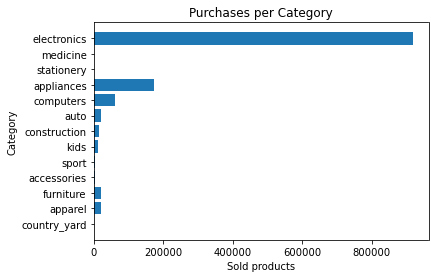

In [46]:
# Plot
plot_category_purchases_conversion_rate(conversion_rate_df)

### Show the conversion rate of each category in decreasing order.

In [39]:
# Calculate the Overall Conversion Rate
overall_conversion_rate = purchases_total/views_total

print("The Overall Conversion Rate is: {}".format(str(overall_conversion_rate)))
print("\n Conversion Rate by Category Code:")

#Print conversion rate
conversion_rate_df

The Overall Conversion Rate is: 0.01590817944828352

 Conversion Rate by Category Code:


,category_code,views,purchases,conversion_rate
6,country_yard,31255,132,0.004223
1,apparel,4477518,22217,0.004962
8,furniture,3295250,19843,0.006022
0,accessories,616475,3741,0.006068
11,sport,415087,2725,0.006565
9,kids,1292002,11648,0.009015
5,construction,1759762,16500,0.009376
3,auto,2157706,21339,0.009890
4,computers,6297977,62332,0.009897
2,appliances,12837916,174022,0.013555
